Vamos utilizar um conjunto de dados com informações sobre diabetes.

Os dados podem ser utilizados em modelos de machine learning para predição da doença.

Os nossos objetivos são:
- Realizar uma análise exploratória dos dados
- Realizar o pré-processamento dos dados
- Realizar classificação usando modelos de machine learning

Os dados foram retirados do Kaggle: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

Começamos importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Em seguida lemos e visualizamos o dataframe


In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Agora checamos as informações de todas as colunas e todas as variáveis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A descrição dos dados mostrou que há valores mínimos igual a 0 em colunas que não deveria, posteriormente isso deverá ser corrigido na etapa de pré-processamento

In [6]:
# formato dos dados em linhas e colunas
data.shape

(768, 9)

Agora vamos visualizar a distribuição das variáveis 

In [7]:
import seaborn as sns

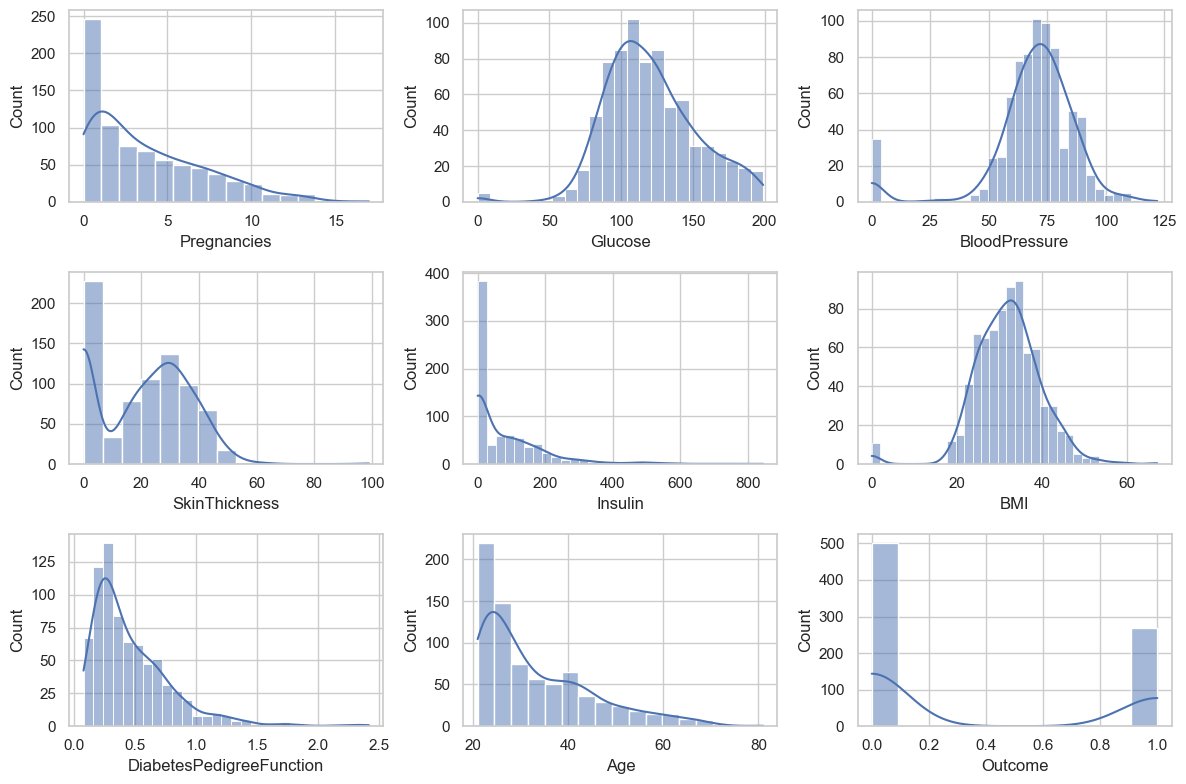

In [8]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando as distribuições usando displot do Seaborn
plt.figure(figsize=(12, 8))
for i, coluna in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=coluna, kde=True)
plt.tight_layout()
plt.show()

Aqui vemos que há 500 pacientes saudáveis e 268 com diabetes

In [9]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Fazemos a correlação entre as variáveis

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Vamos plotar a matrix de correlação para melhor visualização 

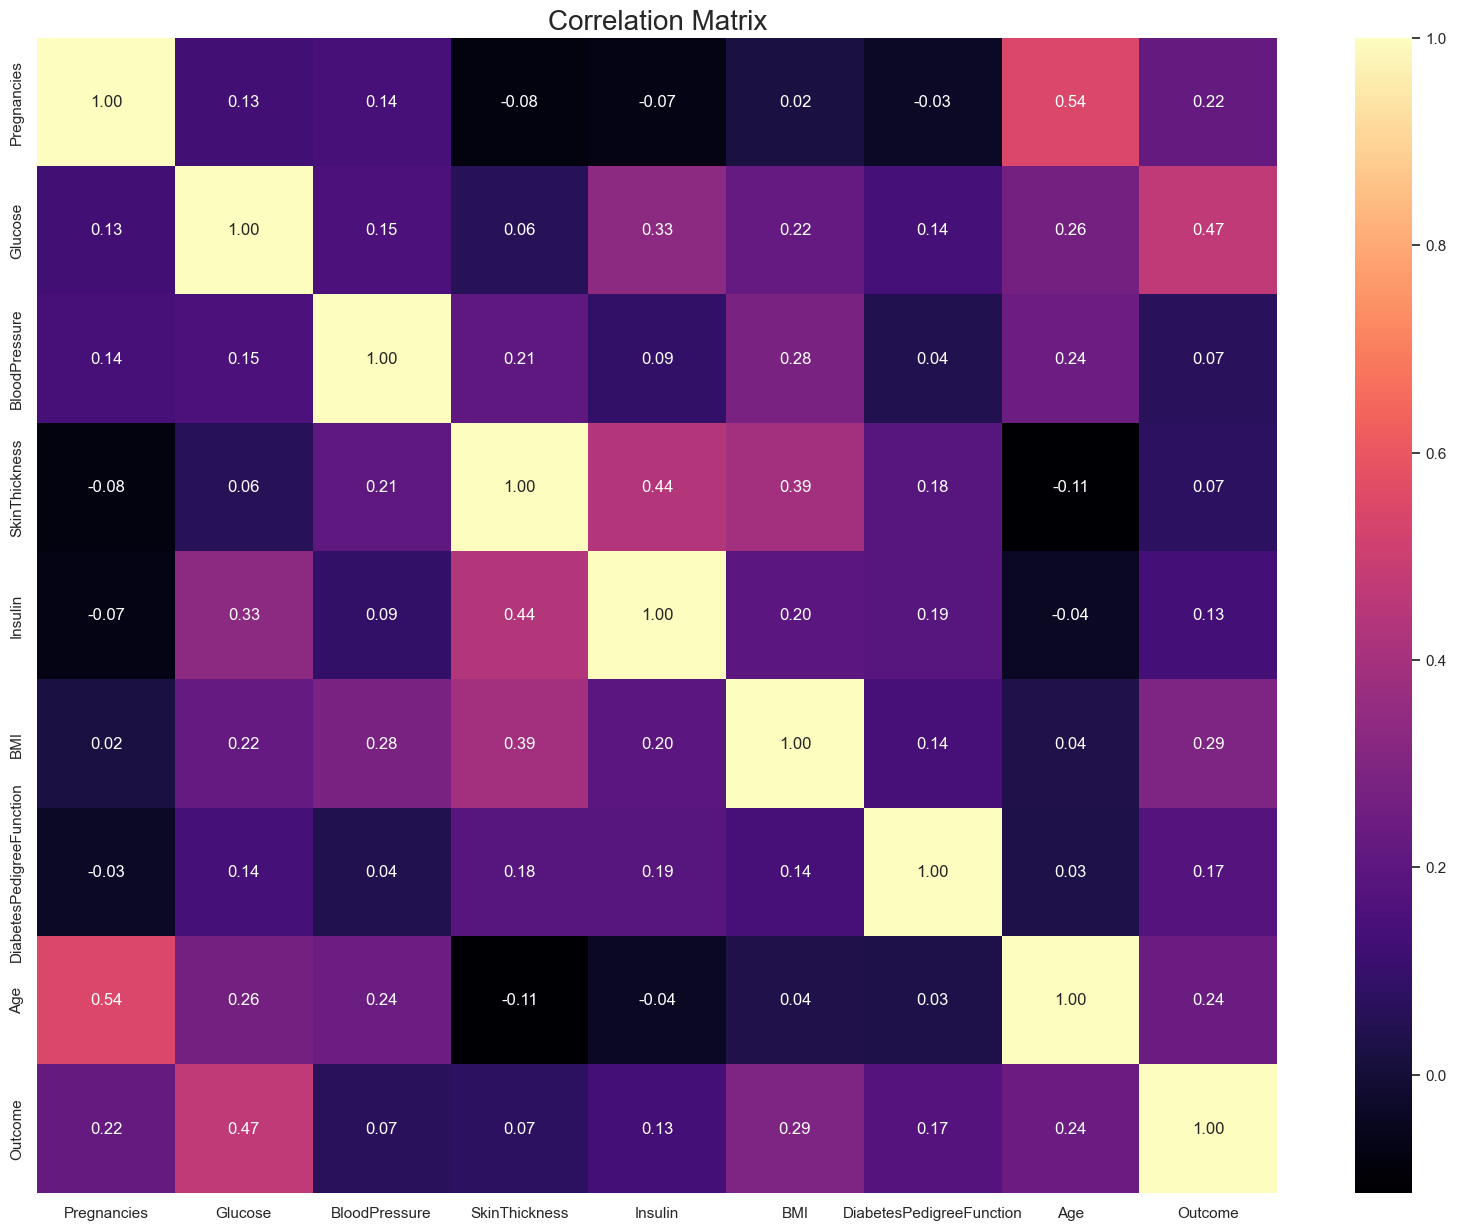

In [11]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Por último plotamos um pairplot para visualizar as relações entre todas as variáveis numéricas

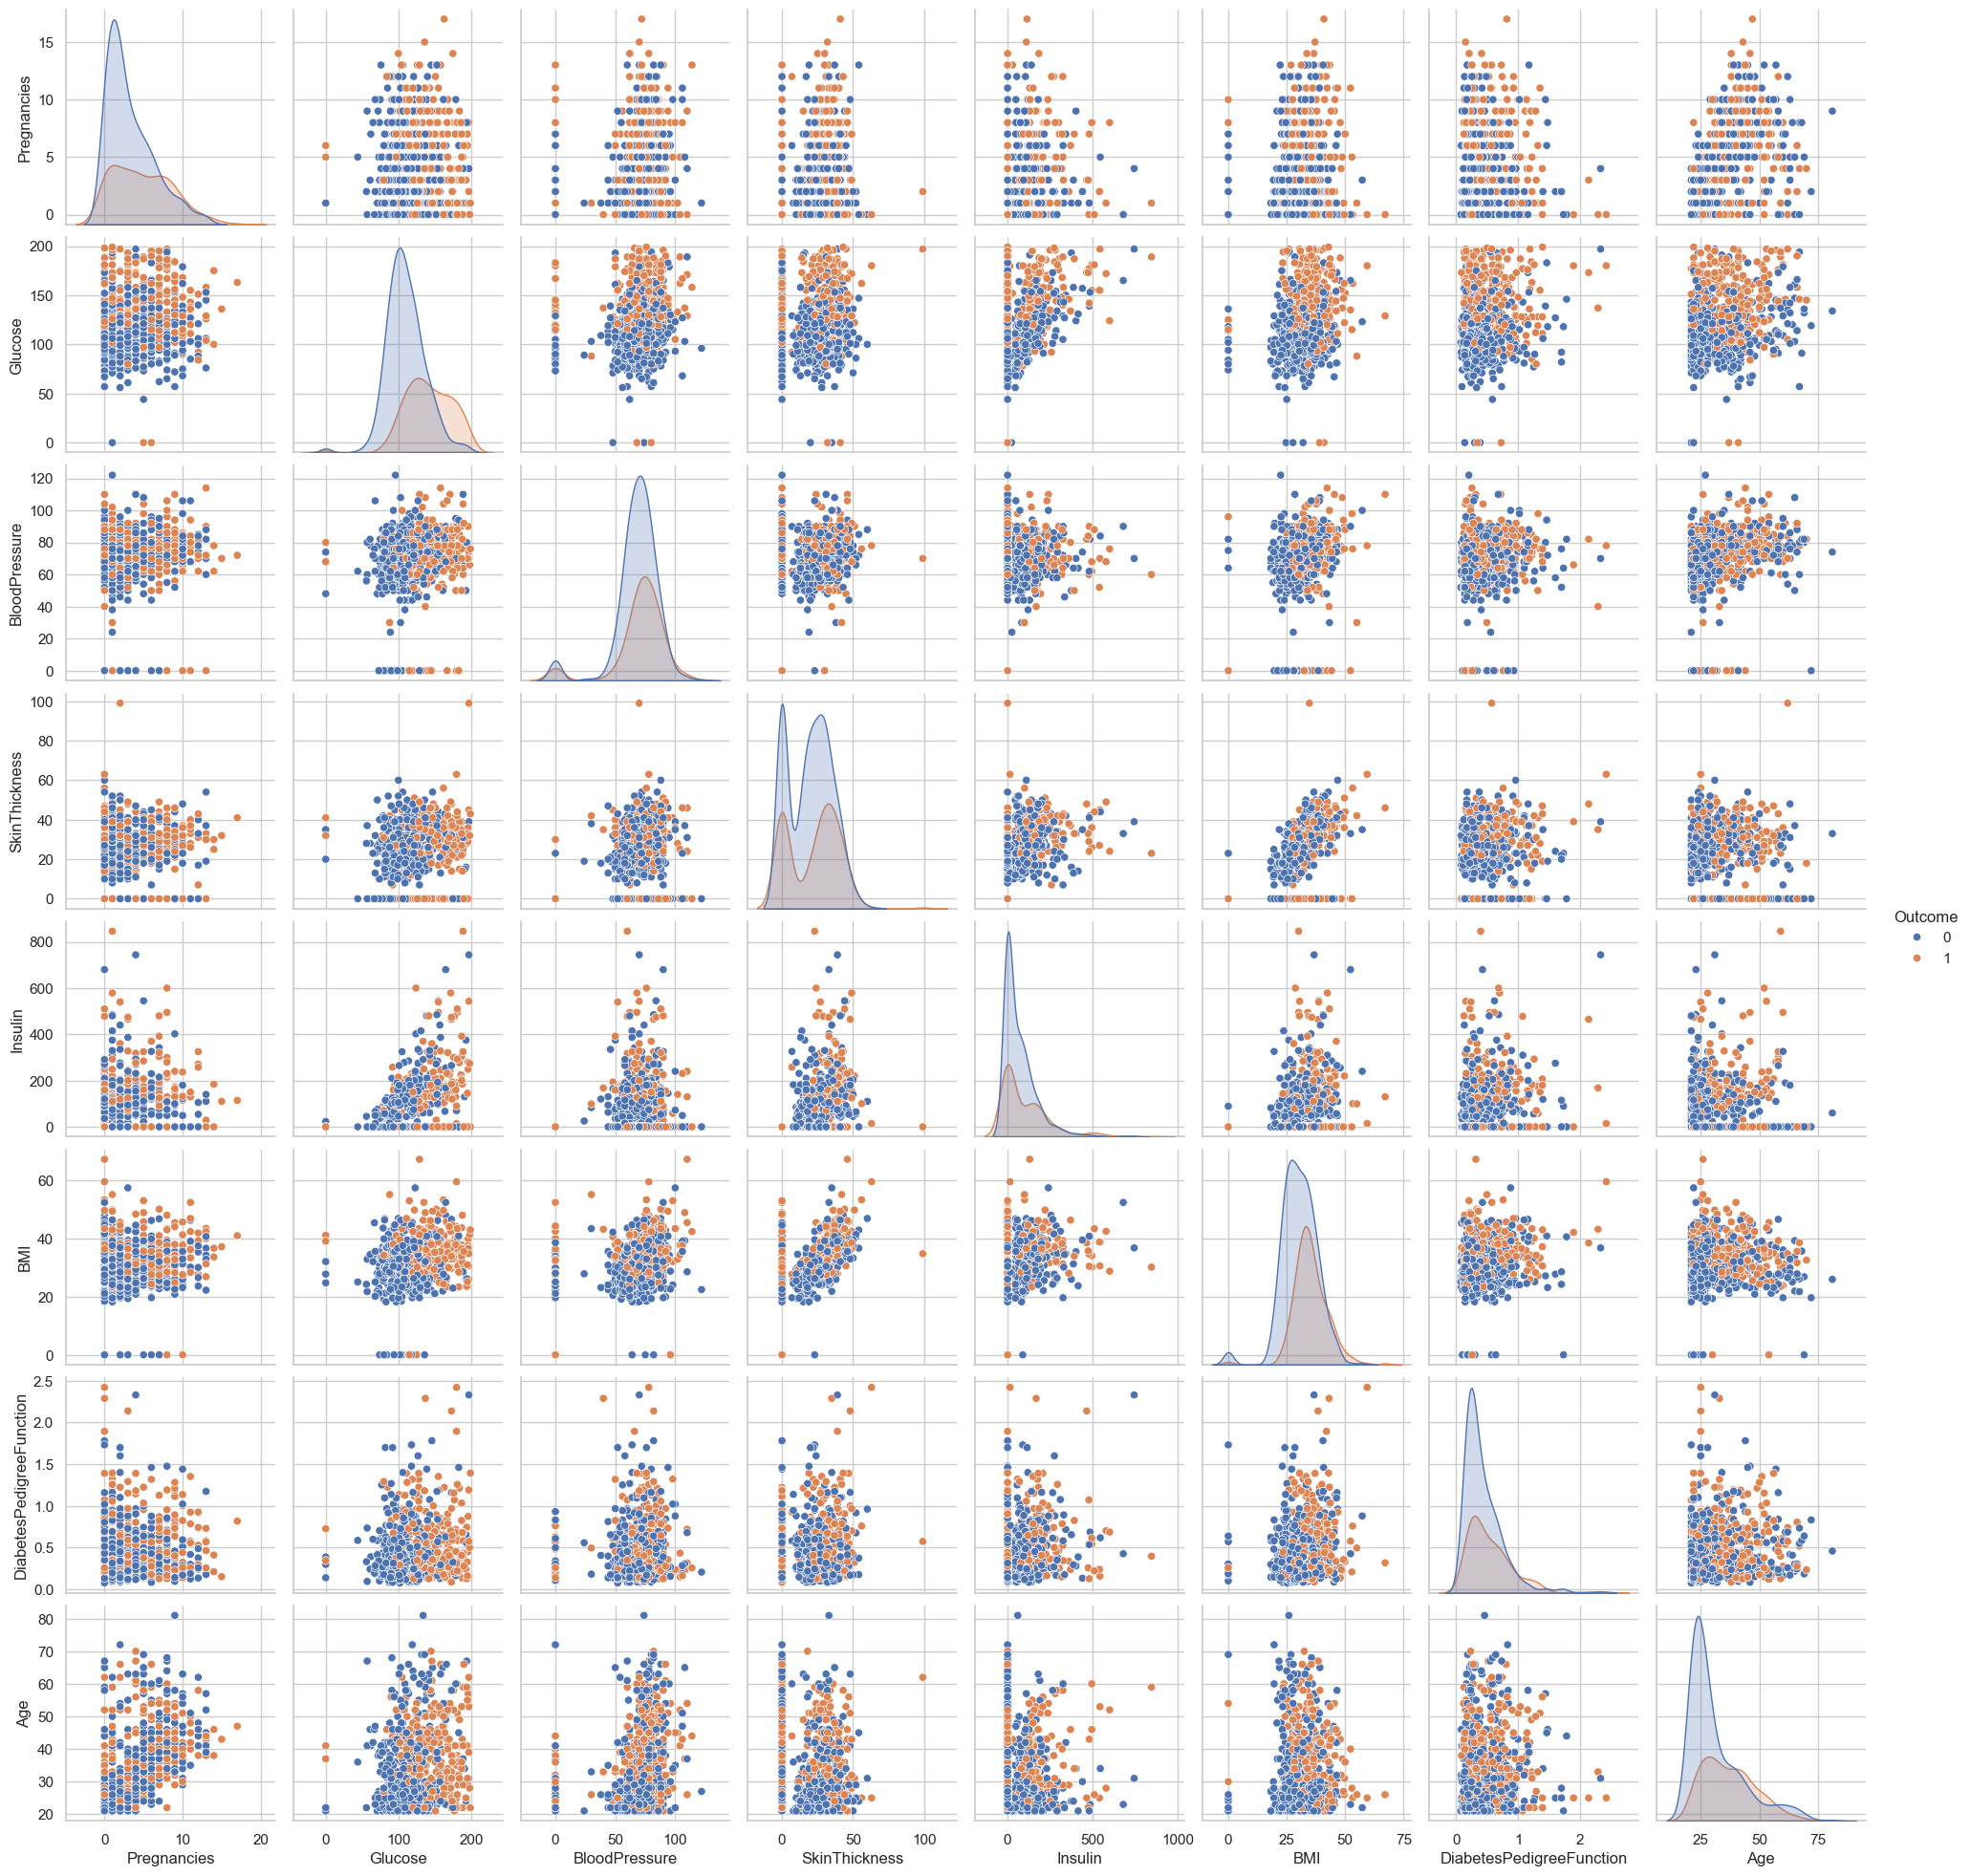

In [12]:
# Removendo colunas não numéricas, se necessário
dados_numericos = data.select_dtypes(include=['float64', 'int64'])

# Criando o pairplot
sns.pairplot(dados_numericos, hue = 'Outcome')
plt.show()

Completamos o primeiro objetivo que é realizar a análise exploratória de dados. 

Vamos seguir agora para o pré-processamento dos dados.

Vamos começar substituindo os valores de 0 por NaN

Para evitar vazamento de dados fazemos essa substituição após a divisão dos dados em treino e teste. 


In [13]:
X = data.drop(columns='Outcome')
y = data['Outcome']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)


Shape de X_train: (614, 8)
Shape de X_test: (154, 8)
Shape de y_train: (614,)
Shape de y_test: (154,)


Agora sim podemos fazer a substituição de valores, vamos novamente visualizar a distribuição dos dados para substituir corretamente os valores nulos

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

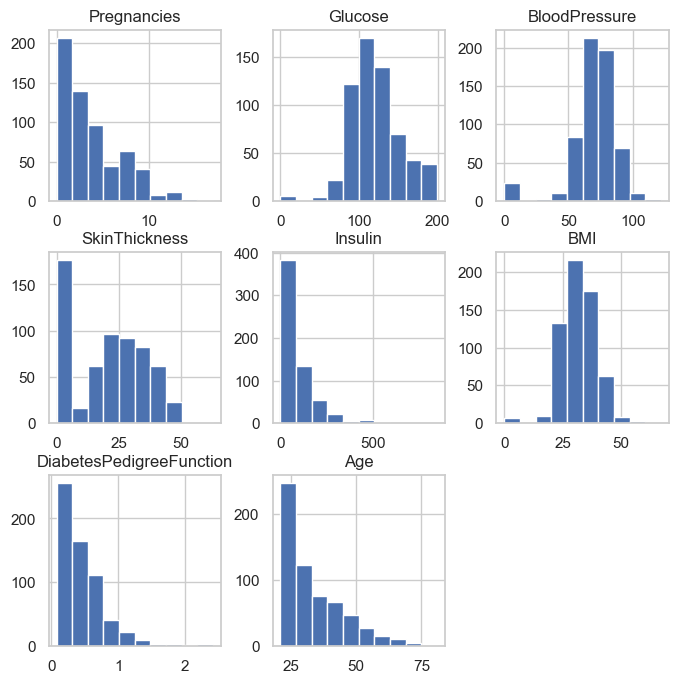

In [17]:
X_train.hist(figsize=(8, 8))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

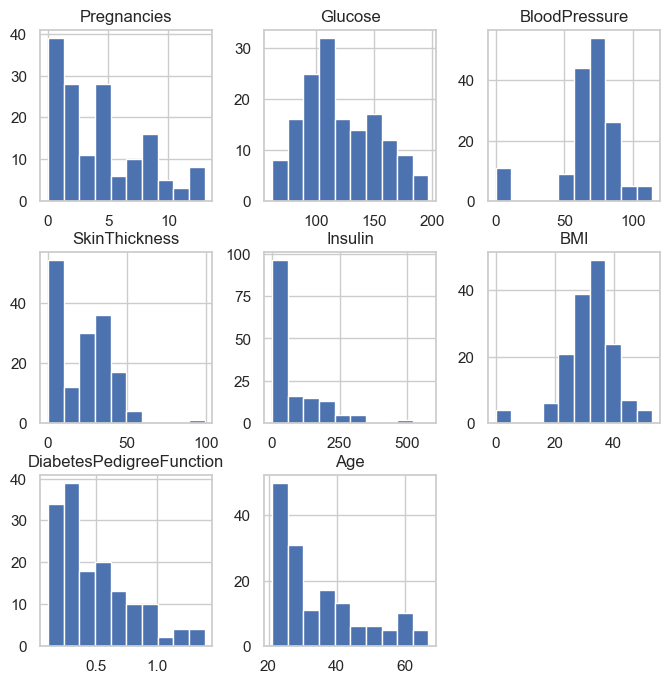

In [18]:
X_test.hist(figsize=(8, 8))

Conforme a distribuição dos dados, vamos substituir os valores nulos das colunas 'Glucose', 'BloodPressure' e 'BMI' pela média e das colunas 'SkinThickness' e 'Insulin' pela mediana

Começamos fazendo a substituição de 0 por Nan

In [19]:
colunas_substituicao = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [20]:
# Substituindo os valores iguais a 0 por NaN nas colunas específicas em X_train
X_train[colunas_substituicao] = X_train[colunas_substituicao].replace(0, np.nan)

# Substituindo os valores iguais a 0 por NaN nas colunas específicas em X_test
X_test[colunas_substituicao] = X_test[colunas_substituicao].replace(0, np.nan)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   609 non-null    float64
 2   BloodPressure             590 non-null    float64
 3   SkinThickness             438 non-null    float64
 4   Insulin                   324 non-null    float64
 5   BMI                       607 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 43.2 KB


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 668 to 462
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    int64  
 1   Glucose                   154 non-null    int64  
 2   BloodPressure             143 non-null    float64
 3   SkinThickness             103 non-null    float64
 4   Insulin                   70 non-null     float64
 5   BMI                       150 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 10.8 KB


Agora substituimos NaN por média e mediana

In [23]:
X_train['Glucose'].fillna(X_train['Glucose'].mean(), inplace=True)
X_train['BloodPressure'].fillna(X_train['BloodPressure'].mean(), inplace=True)
X_train['SkinThickness'].fillna(X_train['SkinThickness'].median(), inplace=True)
X_train['Insulin'].fillna(X_train['Insulin'].median(), inplace=True)
X_train['BMI'].fillna(X_train['BMI'].mean(), inplace=True)

In [24]:
X_test['Glucose'].fillna(X_test['Glucose'].mean(), inplace=True)
X_test['BloodPressure'].fillna(X_test['BloodPressure'].mean(), inplace=True)
X_test['SkinThickness'].fillna(X_test['SkinThickness'].median(), inplace=True)
X_test['Insulin'].fillna(X_test['Insulin'].median(), inplace=True)
X_test['BMI'].fillna(X_test['BMI'].mean(), inplace=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

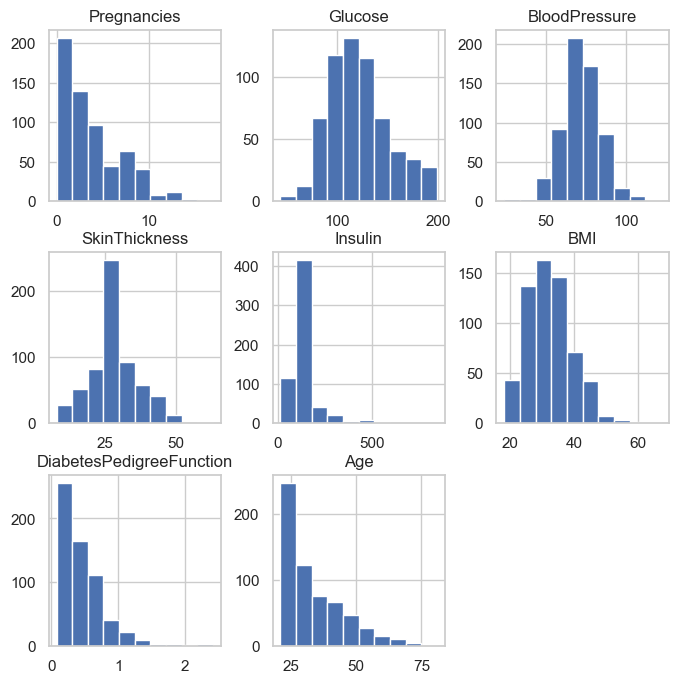

In [25]:
X_train.hist(figsize=(8, 8))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

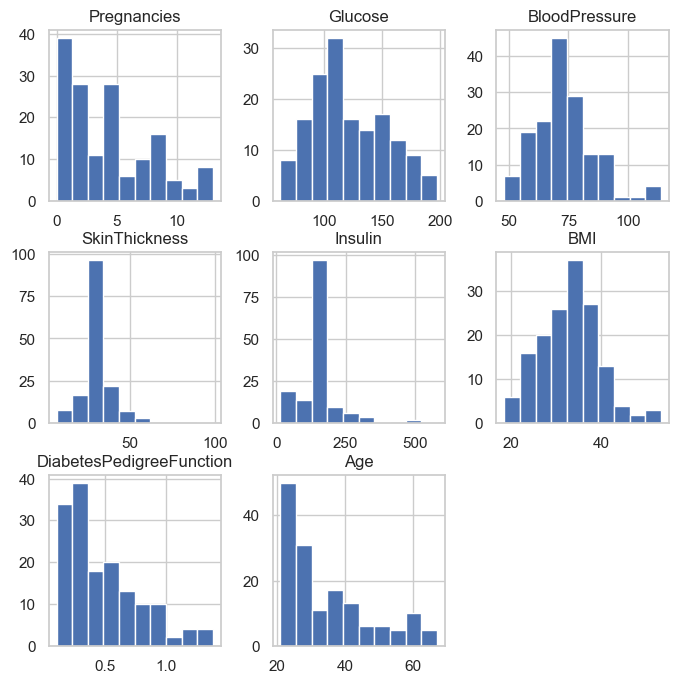

In [26]:
X_test.hist(figsize=(8, 8))

Vamos padronizar os dados usando StandardScaler, ele redimensiona os dados de forma que tenham uma média zero e um desvio padrão igual a um. 
Essa técnica pode ser utilizada especialmente para modelos sensíveis à escala ou medidas de distância, como os que vamos utilizar aqui

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
X_train_rescaled = sc.fit_transform(X_train)
X_test_rescaled = sc.transform(X_test)

Finalizamos o pré-processamento, agora podemos construir nossos modelos de classificação

Vamos realizar a classificação usando dois modelos: Regressão Logística e Random Forest


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Podemos tentar ajustar os parâmetros do modelo para obter um melhor resultado.

Vamos usar a função GridSearch do Scikit-Learn para encontrar os valores ideais. 

In [31]:
parametros = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

In [32]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros, cv=5)

In [33]:
result = grid_search.fit(X_train_rescaled, y_train)

In [34]:
# Acessar os resultados do Grid Search
print("Melhores hiperparâmetros:", result.best_params_)
print("Melhor pontuação de validação cruzada:", result.best_score_)

# Acessar o melhor modelo encontrado pelo Grid Search
melhor_modelo = result.best_estimator_

# Avaliar o desempenho do melhor modelo em dados de teste
resultado_teste = melhor_modelo.score(X_test_rescaled, y_test)
print("Acurácia no conjunto de teste:", resultado_teste)

Melhores hiperparâmetros: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Melhor pontuação de validação cruzada: 0.7687724910035986
Acurácia no conjunto de teste: 0.7532467532467533


Criamos e ajustamos os dados ao modelo

In [35]:
logreg = LogisticRegression(C = 10, max_iter = 100, solver = 'liblinear')

logreg.fit(X_train_rescaled, y_train)

LogisticRegression(C=10, solver='liblinear')

Fazemos a predição com os dados de teste e vemos a performance através das métricas

In [36]:
y_pred = logreg.predict(X_test_rescaled)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



Agora plotamos a matriz de confusão 

In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[82, 17],
       [21, 34]], dtype=int64)

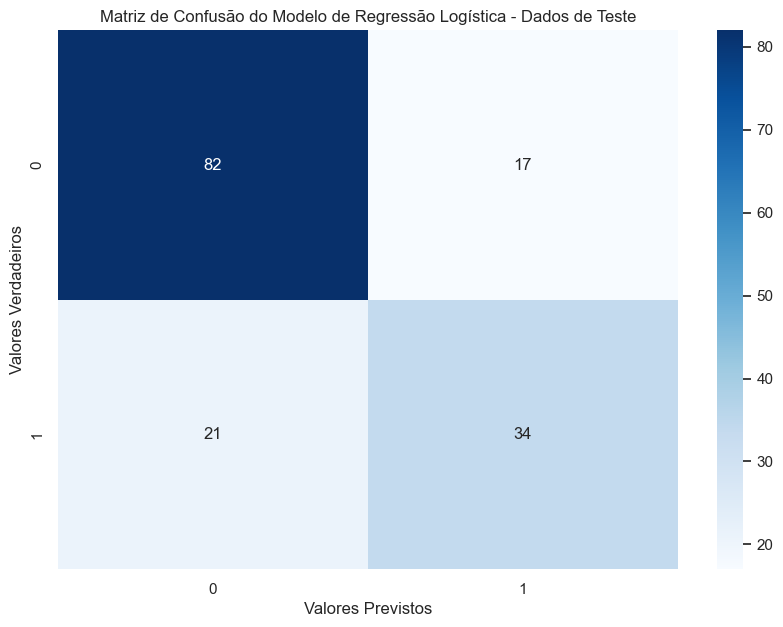

In [39]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title('Matriz de Confusão do Modelo de Regressão Logística - Dados de Teste')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.show()

Vemos que o modelo está prevendo melhor a classe 0 (não diabetes). 

Porém também vemos que há um desbalanceamento na quantidade de dados das duas classes e isso pode colaborar para esses resultados.
Além disso o nosso dataset não contém muitas features, os dados podem ser insuficientes para uma boa classificação.

Verificamos o desempenho do modelo com os dados de treino para verificar se houve overfitting

In [40]:
y_train_pred = logreg.predict(X_train_rescaled)

In [41]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       401
           1       0.72      0.57      0.64       213

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614



Agora vamos para o segundo modelo: Random Forest

In [65]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_rescaled, y_train)

RandomForestClassifier()

In [66]:
y_rf_pred = rf_classifier.predict(X_test_rescaled)

In [67]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [68]:
cm = confusion_matrix(y_test, y_rf_pred)
cm

array([[81, 18],
       [16, 39]], dtype=int64)

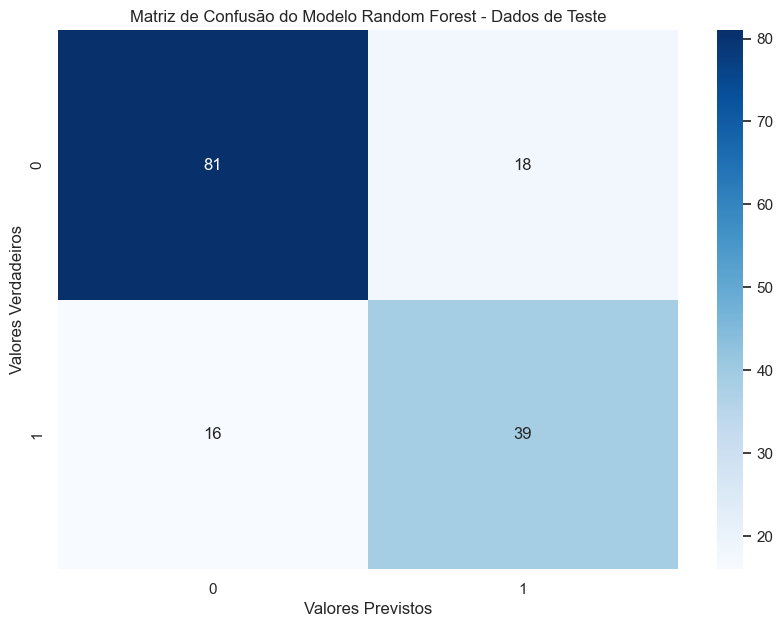

In [69]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Matriz de Confusão do Modelo Random Forest - Dados de Teste')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.show()

Comparando com o modelo anterior, o random forest obteve melhor desempenho ao classificar a classe 1 (diabetes)

Também verificamos o desempenho do modelo com os dados de treino

In [70]:
y_rf_train_pred = rf_classifier.predict(X_train_rescaled)

In [71]:
print(classification_report(y_train, y_rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Por último criamos uma função para receber novos dados de diabetes e realizar predições

In [72]:
def prever_diabetes(dados):
    # padronizando os dados
    ss = sc.transform(dados)
    # Fazendo previsões usando o modelo treinado
    previsao = rf_classifier.predict(ss)
    
    # Retornando a previsão (0 para não diabetes, 1 para diabetes)
    if previsao[0] == 0:
        return "Você não tem diabetes"
    else:
        return "Você tem diabetes"


In [73]:
# Novos dados para prever se a pessoa tem diabetes
diabetes_test = [[2, 81, 72, 15, 76, 30.1, 0.547, 25]]

# Obtendo a previsão usando a função
resultado = prever_diabetes(diabetes_test)

print("Resultado da previsão:", resultado)

Resultado da previsão: Você não tem diabetes


c:\Users\hanna\miniforge3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Concluímos assim a primeira aula do nosso curso.
Aqui usamos os modelos 'crus' para simplificar para quem está iniciando, no entanto, é sempre bom consultar a documentação dos modelos para ajustar parâmetros de acordo com o seu problema.

No livro 'Mãos à obra: Aprendizado de Máquina com Scikit-Learn, Keras e Tensorflow' também é possível ver exemplos do que não mostrei aqui ainda, mas veremos em aulas futuras, como feature engineering e pipelines.

Estou sempre a disposição para dúvidas e discussões: hannacarla47@gmail.com